# CNNの各層の可視化

学習済みのVGG16を使って、各畳み込み層の出力を可視化します。

In [1]:
import cv2
import math
import numpy as np
from sklearn.datasets import load_sample_image
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def preprocess(img):
    """VGG16に合わせて前処理を行います。
    """
    img = cv2.resize(img.copy(), (224, 224))
    img = preprocess_input(img)
    return img

def plot(img, title):
    """画像を表示します。
    """
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.title(title)
    plt.imshow(img)
    plt.show()
    
def multiplot(output, num_row, title):
    """複数画像を表示します。
    """
    imgs = output.transpose(2, 0, 1).copy()
    with np.errstate(divide='ignore', invalid='ignore'):
        imgs = np.array([img / img.max() * 255. for img in imgs])
        imgs[~ np.isfinite(imgs)] = 0
    mod = imgs.shape[0] % num_row
    if mod:
        imgs = np.concatenate([imgs, np.array([np.zeros_like(imgs[0]) for _ in range(num_row - mod)])])
    column_imgs = []
    for i in range(imgs.shape[0] // num_row):
        row_imgs = np.concatenate(imgs[i*num_row:(i+1)*num_row], axis=1)
        column_imgs.append(row_imgs)
    plot_img = np.concatenate(column_imgs)
    
    plt.figure(figsize=(20, 20))
    plt.xticks(color="None")
    plt.yticks(color="None")
    plt.tick_params(length=0)
    plt.title(title)
    plt.imshow(plot_img)
    plt.show()

まず、使用するVGG16を確認しておきます。シンプルなCNNです。

In [3]:
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

このままでは最終層の結果しか出力されないため、  
とりあえず全層の結果を出力するモデルを新たに作ります。

In [4]:
layer_outputs = [layer.output for layer in model.layers]
new_model = Model(inputs=model.input, outputs=layer_outputs)

検出を行う画像には、scikit-learnのサンプルを使用します。  

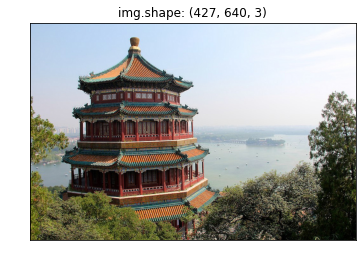

In [5]:
img = load_sample_image('china.jpg')
plot(img, title=f'img.shape: {img.shape}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


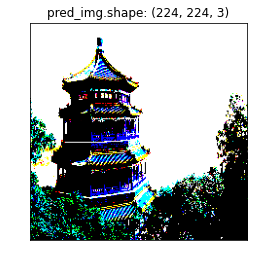

In [6]:
# 前処理を加えます。
pred_img = preprocess(img)
plot(pred_img, title=f'pred_img.shape: {pred_img.shape}')

# 推論用に次元を追加します。
pred_img = pred_img[np.newaxis, ...]

準備は完了です。まず推論結果を確認しておきます。  
修道院と判別されているようなので、問題なさそうです。

In [7]:
decode_predictions(model.predict(pred_img))

[[('n03781244', 'monastery', 0.28533006),
  ('n04346328', 'stupa', 0.21372373),
  ('n03877845', 'palace', 0.185511),
  ('n03028079', 'church', 0.17231292),
  ('n02859443', 'boathouse', 0.042594995)]]

それでは、各層の出力を可視化したいと思います。  
outputsには、全層の出力が入力層から順番に格納されています。

In [8]:
outputs = new_model.predict(pred_img)

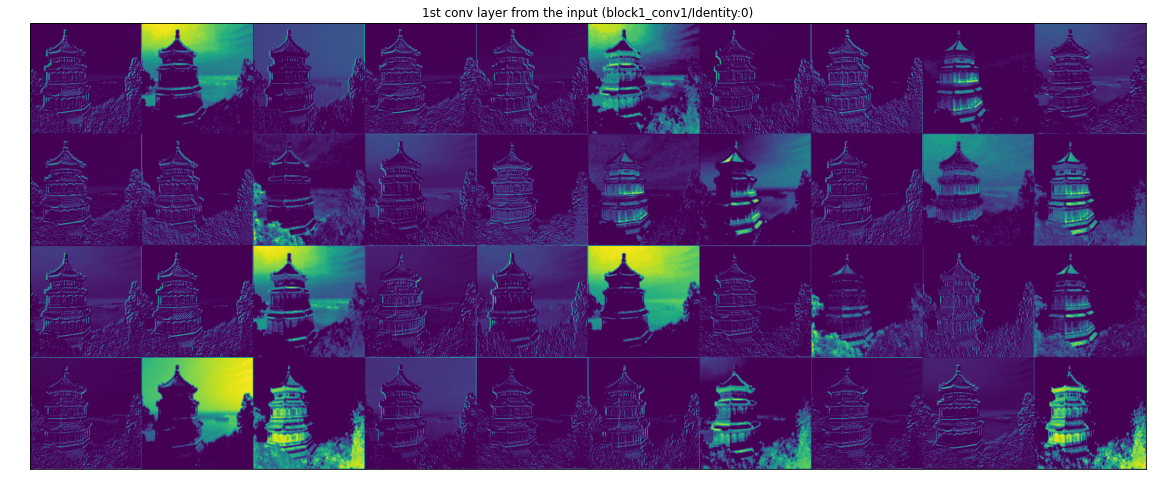

In [9]:
n = 1
multiplot(
    output=outputs[n][0][..., :40],
    num_row=10,
    title=f'1st conv layer from the input ({new_model.outputs[n].name})')

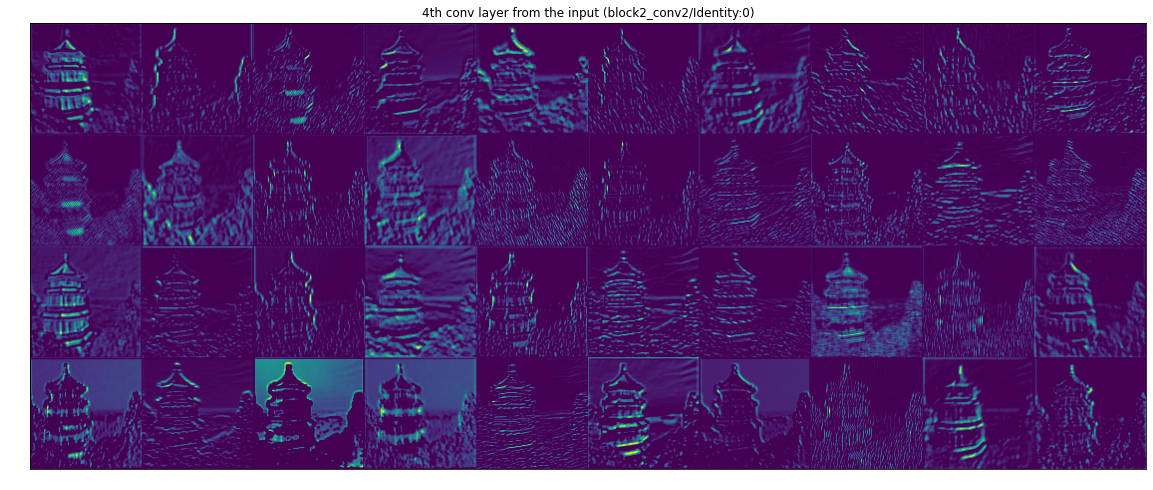

In [10]:
n = 5
multiplot(
    output=outputs[n][0][..., :40],
    num_row=10,
    title=f'4th conv layer from the input ({new_model.outputs[n].name})')

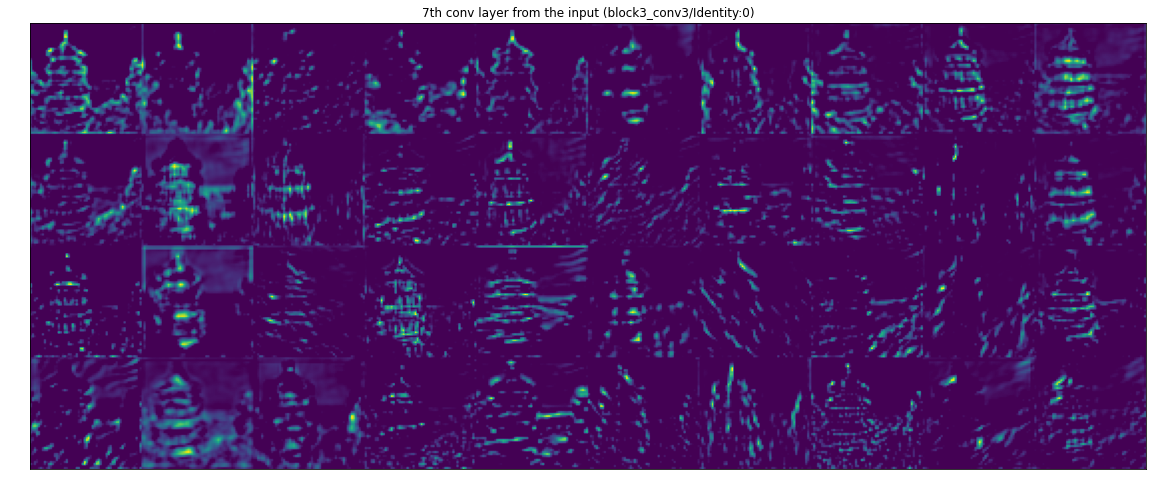

In [11]:
n = 9
multiplot(
    output=outputs[n][0][..., :40],
    num_row=10,
    title=f'7th conv layer from the input ({new_model.outputs[n].name})')

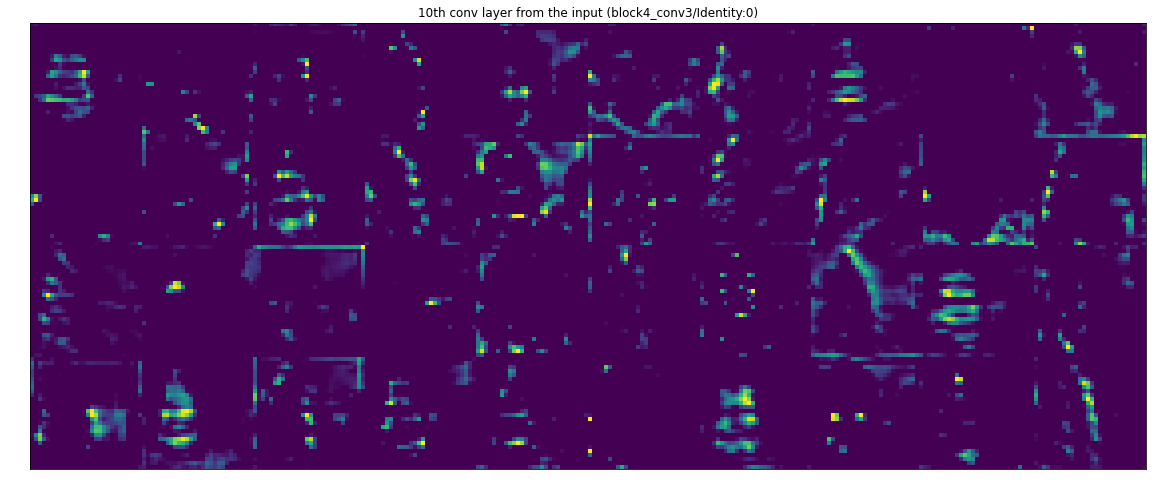

In [12]:
n = 13
multiplot(
    output=outputs[n][0][..., :40],
    num_row=10,
    title=f'10th conv layer from the input ({new_model.outputs[n].name})')

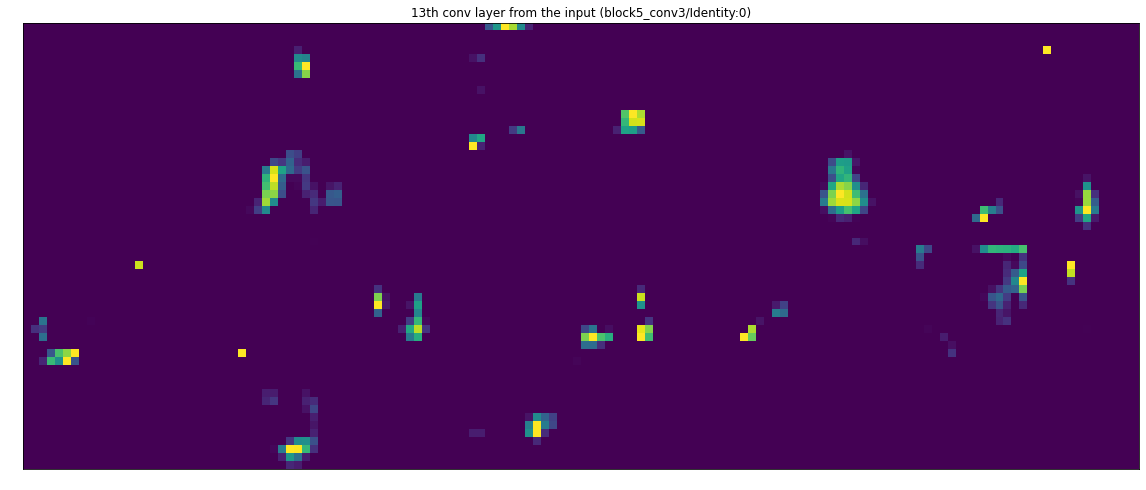

In [13]:
n = 17
multiplot(
    output=outputs[n][0][..., :40],
    num_row=10,
    title=f'13th conv layer from the input ({new_model.outputs[n].name})')